### Use the models to predict metabolites of some yeast strains and visualize the values

In [155]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

import pickle

In [156]:
#LOAD YOUR Dataframe from where to extract metabolite names
samples = pd.read_csv('../data/predictions/samples.csv',index_col=0)
#LOAD YOUR PROTEOMICS DATA: COLUMNS SHOULD BE PROTEIN-ORFS (www.yeastgenome.org) AND INDEX EACH YEAST STRAIN
example = pd.read_csv('../data/predictions/example.csv',index_col=0)

In [157]:
for position in range(726,738):  #go through model and feature 'filter' for each target

#load the featured list for the specific target 
#(DF with selected features are named according to the iloc in the 'all_data_13.csv' DataFrame)
    filename = f'../data/selected features/40/{position}.csv'
    features = pd.read_csv(filename,index_col=0).columns.get_values()
    features_example = example[features]
#load the model for the specific target (models are numbered according to the iloc in the 'all_data_13.csv' DataFrame)
    model_filename = f'../models/{position}.sav'
    model = pickle.load(open(model_filename, 'rb'))
    result = model.predict(features_example)
    result = result.clip(min=0)
#add the prediction for each metabolite and strain to the dataframe with column name = metabolite name
    metabolite_name = samples.columns.get_values()[position]
    example[metabolite_name] = pd.Series(list(result), index=example.index)
#save the new dataframe 
example_predictions = example.iloc[:,726:738]
filename_example_predictions = '../data/predictions/example_predictions.csv'
example_predictions.to_csv(filename_example_predictions, index=True)
print('Glycolysis and PPP!')
example_predictions


Glycolysis and PPP!


,6-Phospho-D-gluconate,"D-Fructose 1,6-bisphosphate",D-Fructose 6-phosphate,D-Glucose,D-Glucose 6-phosphate;D-Fructose 6-phosphate;beta-D-glucose 6-phosphate,D-Xylulose 5-phosphate;D-Ribulose 5-phosphate,Dihydroxyacetone phosphate,Glyceraldehyde 3-phosphate,Phosphoenolpyruvate,Pyruvate,Sedoheptulose 7-phosphate
Strain1,341.675298,11670.411433,15505.291750,18199.191125,16005.090501,1484.957654,4302.115060,648.611269,176.010274,5648.538028,1000.653158
Strain2,98.352884,1536.526497,1553.542449,15635.394499,14553.772150,1125.487447,0.000000,77.031507,40.437169,6.150755,255.155563
Strain3,229.970015,10102.414271,9542.022193,13558.272378,12804.115305,957.514356,1495.509418,324.345366,170.274228,5530.953455,779.097139
Strain4,288.052883,9945.466093,11002.946595,14031.284969,14052.313891,879.204898,2421.806638,410.046284,132.689946,4800.211749,867.525183


Sedoheptulose 7-phosphate


<BarContainer object of 4 artists>

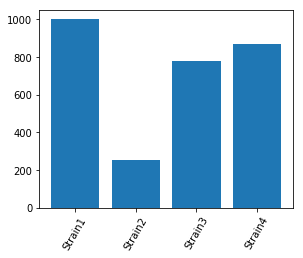

In [158]:
position = 10   #from 0 to 11

fig = plt.figure(figsize=(10,8))
plt.title(print(example_predictions.columns.get_values()[position]))

sub1 = plt.subplot(2,2,1)

plt.xticks(fontsize = 10, rotation=60)
plt.bar(example_predictions.index.get_values(), example_predictions.iloc[:,position])

In [159]:
#for those interested: check the FEATURES used to predict a metabolite:

position = 726 #from 726 to 738...
metabolite_name = samples.columns.get_values()[position]
filename = f'../data/selected features/40/{position}.csv'
features = pd.read_csv(filename,index_col=0).columns.get_values()
print(metabolite_name)
print(features)

3-Phospho-D-glycerate;D-Glycerate 2-phosphate
['YAL012W' 'YBR011C' 'YBR084W' 'YBR111C' 'YBR154C' 'YCR002C' 'YDL182W'
 'YDR064W' 'YDR533C' 'YER012W' 'YER052C' 'YER089C' 'YFL018C' 'YGL048C'
 'YGL062W' 'YGL255W' 'YGR061C' 'YGR086C' 'YGR204W' 'YGR240C' 'YGR254W'
 'YHR027C' 'YHR042W' 'YJL001W' 'YJL172W' 'YJL217W' 'YJR109C' 'YKL067W'
 'YKL112W' 'YLR061W' 'YLR314C' 'YLR359W' 'YML008C' 'YMR099C' 'YMR186W'
 'YNR016C' 'YOL151W' 'YOR007C' 'YOR259C' 'YPL262W']
